# Load du lieu chung khoan VCB

In [19]:
import yfinance as yf

def loaddataYFinance(from_date, to_date):
    data = yf.download('MSFT', start=from_date, end=to_date)
    data.reset_index(inplace=True)
    data = data.rename(columns={'Date': 'Datetime'})
    
    return data

In [20]:
from_date = '2023-01-01'
to_date = '2024-01-07'

data = loaddataYFinance(from_date, to_date)

data

[*********************100%%**********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,243.080002,245.750000,237.399994,239.580002,237.474335,25740000
1,2023-01-04,232.279999,232.869995,225.960007,229.100006,227.086456,50623400
2,2023-01-05,227.199997,227.550003,221.759995,222.309998,220.356110,39585600
3,2023-01-06,223.000000,225.759995,219.350006,224.929993,222.953079,43613600
4,2023-01-09,226.449997,231.240005,226.410004,227.119995,225.123856,27369800
...,...,...,...,...,...,...,...
249,2023-12-29,376.000000,377.160004,373.480011,376.040009,376.040009,18723000
250,2024-01-02,373.859985,375.899994,366.769989,370.869995,370.869995,25258600
251,2024-01-03,369.010010,373.260010,368.510010,370.600006,370.600006,23083500
252,2024-01-04,370.670013,373.100006,367.170013,367.940002,367.940002,20901500


# Backtest du lieu tren hoi quy tuyen tinh

### Them co Close_Predict vao

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Tải dữ liệu
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Chọn features và target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Chuyển DataFrame sang mảng numpy
X = data[features].values
y = data[target].values

# Xây dựng mô hình trên toàn bộ dữ liệu
model = LinearRegression()
model.fit(X, y)

# Dự đoán giá cổ phiếu cho toàn bộ dữ liệu
data['Close_Predict'] = model.predict(X)

# Tính toán phần trăm chênh lệch giữa dự đoán và thực tế
data['Percent_Diff'] = ((data['Close_Predict'] - data['Close']) / data['Close']) * 100

# Xem kết quả
print(data)

# Xuất ra kết quả
data.to_csv('Buoi 10.11.3 Backtest dua tren Hoi quy tuyen tinh.csv')


      Datetime        Open        High         Low       Close   Adj Close  \
0   2023-01-03  243.080002  245.750000  237.399994  239.580002  237.474335   
1   2023-01-04  232.279999  232.869995  225.960007  229.100006  227.086456   
2   2023-01-05  227.199997  227.550003  221.759995  222.309998  220.356110   
3   2023-01-06  223.000000  225.759995  219.350006  224.929993  222.953079   
4   2023-01-09  226.449997  231.240005  226.410004  227.119995  225.123856   
..         ...         ...         ...         ...         ...         ...   
249 2023-12-29  376.000000  377.160004  373.480011  376.040009  376.040009   
250 2024-01-02  373.859985  375.899994  366.769989  370.869995  370.869995   
251 2024-01-03  369.010010  373.260010  368.510010  370.600006  370.600006   
252 2024-01-04  370.670013  373.100006  367.170013  367.940002  367.940002   
253 2024-01-05  368.970001  372.059998  366.500000  367.750000  367.750000   

       Volume  Close_Predict  Percent_Diff  
0    25740000     

### Danh gia mo hinh Ok khong?

Số lượng dự đoán chính xác: 183
Tổng số dự đoán: 254
Tỷ lệ dự đoán chính xác: 72.05%
count    254.000000
mean       0.002055
std        0.512174
min       -1.323812
25%       -0.326032
50%       -0.034069
75%        0.315799
max        2.278467
Name: Percent_Diff, dtype: float64


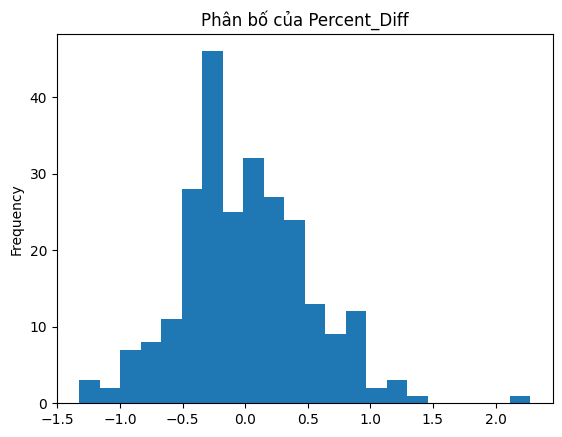

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Ví dụ về việc đánh giá mức độ chênh lệch dưới 1%
threshold0 = -0.5
threshold1 = 0.5

# Tính số lượng và tỷ lệ phần trăm dự đoán có Percent_Diff dưới 1%
accurate_predictions_count = ((data['Percent_Diff'] >= threshold0) & (data['Percent_Diff'] <= threshold1)).sum()

total_predictions_count = data.shape[0]
accuracy_percentage = (accurate_predictions_count / total_predictions_count) * 100

print(f"Số lượng dự đoán chính xác: {accurate_predictions_count}")
print(f"Tổng số dự đoán: {total_predictions_count}")
print(f"Tỷ lệ dự đoán chính xác: {accuracy_percentage:.2f}%")

# Thống kê mô tả
print(data['Percent_Diff'].describe())

# Vẽ biểu đồ phân bố của Percent_Diff
data['Percent_Diff'].plot(kind='hist', bins=22, title='Phân bố của Percent_Diff')
plt.show()


## Backtest du lieu tren hoi quy tuyen tinh: Du doan gia co phieu tuong lai

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Giả sử 'data' là DataFrame chứa 'Open', 'High', 'Low', 'Close' cho các ngày gần đây
data = data[['Open', 'High', 'Low', 'Close']]

# Huấn luyện mô hình hồi quy tuyến tính riêng biệt cho mỗi cột
models = {}
for column in ['Open', 'High', 'Low', 'Close']:
    model = LinearRegression()
    X_train = data.drop(column, axis=1)  # Sử dụng tất cả các cột khác làm đặc trưng
    y_train = data[column]  # Cột hiện tại là giá trị mục tiêu
    model.fit(X_train, y_train)
    models[column] = model

# Khởi tạo DataFrame để lưu trữ dữ liệu dự đoán
predicted_data = pd.DataFrame(columns=['Predicted_Open', 'Predicted_High', 'Predicted_Low', 'Predicted_Close'])

for day in range(1, 31):
    for column in ['Open', 'High', 'Low', 'Close']:
        # Lấy dữ liệu của ngày cuối cùng và loại bỏ cột đang được dự đoán
        last_day_data = data.iloc[-1].drop(column).values.reshape(1, -1) # Chuyen thanh mang 1 hang va n cot

        # Sử dụng mô hình tương ứng để dự đoán mỗi cột
        model = models[column]
        predicted_value = model.predict(last_day_data)[0]
        
        # Lưu giá trị dự đoán vào DataFrame
        predicted_data.loc[day, f'Predicted_{column}'] = predicted_value

        # Cập nhật dữ liệu trong 'data' với giá trị dự đoán
        data.loc[data.index[-1], column] = predicted_value

# In ra dữ liệu dự đoán
print("Dữ liệu dự đoán OHLV cho 30 ngày tương lai:")
print(predicted_data)


c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC-DELL-CU\AppData\Local\Temp\ipykernel_6200\834947567.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.index[-1], column] = predicted_value
c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC-DELL-CU\AppData\Local\Temp\ipykernel_6200\834947567.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

Dữ liệu dự đoán OHLV cho 30 ngày tương lai:
   Predicted_Open Predicted_High Predicted_Low Predicted_Close
1       370.54209     371.805216    366.063846      368.047596
2      369.721991     371.648374    365.777286      368.209844
3      369.214624     371.542561    365.588224      368.292878
4      368.895114     371.465504    365.459756      368.328775
5      368.688656      371.40528    365.368267      368.336426
6      368.550287     371.355084    365.299183      368.327103
7      368.452942     371.310907    365.243637      368.307572
8      368.380324     371.270358    365.196264      368.281901
9      368.322611     371.232001    365.153826      368.252541
10     368.273889     371.194975    365.114371      368.220967
11     368.230592      371.15876    365.076723      368.188068
12     368.190574     371.123041    365.040173       368.15438
13      368.15254     371.087632    365.004293      368.120225
14     368.115712     371.052417    364.968826      368.085799
15     368.

C:\Users\PC-DELL-CU\AppData\Local\Temp\ipykernel_6200\834947567.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.index[-1], column] = predicted_value
c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC-DELL-CU\AppData\Local\Temp\ipykernel_6200\834947567.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.index[-1], column] = predicted_value
c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-pack